# Techniques for reading in multiple days of data

#### Material you may want to play with for Week 6

In [14]:
# You will want to import some packages. You can import them as you go, but most people prefer to do it all at once.

import numpy as np # Numpy is the Python package for handling arrays

import pandas as pd # Pandas is the Python package for handling dataframes
# Allow pandas to print extra-wide tables.
pd.set_option('max_columns', 500)
pd.set_option('max_colwidth', 500)

import random # You need random numbers for sampling and lots of stuff

import matplotlib.pyplot as plt # This is the package for plotting.
import matplotlib.dates as mdate
# You need to include this next line if you want your plots to appear in your notebooks.
%matplotlib inline 
import statsmodels.api as sm # Statsmodels has lots of statistics features including regression modeling.
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std # and we borrow a new function still being tested for estimating error.

from IPython.core.display import Image # Allows us to display images

from datetime import datetime # Lets us work with dates and times as computable formats


In [5]:
# Start by reading in one day of data. There are lots of ways to do this, but my preference is to use the pandas package
# which will load the data into a dataframe

df = pd.read_csv('1503555882928-JS_ALL_V.20170515_20170530.csv',compression='gzip',delimiter='|')

# Python is fairly flexible about what type of file you give it. Above I have a pipe delimited csv file that is compressed. It has
# column headings in the first row. Google 'pandas read_csv' to understand the options if you have, for example,
# tab delimited data, a different file extension, or several rows of headers.The file extension has been changed to .csv because 
# theBox only allows certain file extensions. 

#Uncomment the next three lines if you are not using the Opal Data.
#df = pd.read_csv('data/20170517sample.csv',index_col=0) 
#df2 = pd.read_csv('data/20170524sample.csv',index_col=0)
#df = pd.concat([df,df2])

df.head(3) # head(x) shows just the first x rows of the df. What do you think tail(x) does?

C:\Users\Tracy Wang\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (37,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CIN,CARD_FK,PSNGR_TYP_CD,CARD_TYP_CD,JRNY_ID,SGMNT_ID,JS_STRT_DT_FK,JS_STRT_TM,DISC_ENT_CD,DISC_ENT_DESC,TS_TYP_CD,TAG1_TS_TYP_CD,TAG2_TS_TYP_CD,OPRTR_ID,OPRTR_SHORT_NM,OPRTR_FULL_NM,JS_TYP_CD,JS_FARE_CENTS_AMT,JS_DURN_SEC,IMTT_CD,IMTT_DESC,JS_TAG1_TYP_DESC,JS_TAG2_TYP_DESC,TAG1_SEQ_NUM,TAG2_SEQ_NUM,TAG1_DT_FK,TAG2_DT_FK,TAG1_TM,TAG2_TM,TAG1_CARD_RDNG_VLDN_RSLT_CD,TAG2_CARD_RDNG_VLDN_RSLT_CD,BUS_TRIP_SK,BUS_OPRTR_FK,BUS_OPRTR_SHORT_NM,BUS_OPRTR_FULL_NM,CUBIC_JRNY_DID,CUBIC_DUTY_DID,TRIP_ID,ROUTE_ID,ROUTE_VAR_ID,ROUTE_VAR_NM,ROUTE_VAR_TYP_CD,ROUTE_VAR_TYP_NM,RUN_DIR_CD,RUN_NUM,SHIFT_ID,DRIVER_CONSOLE_ID,DRIVER_ID,DEPOT_ID,BUS_ID,CONTRACT_ID,CONTRACT_CD,TAG1_TS_FK,TAG1_TS_NUM,TAG1_TS_NM,TAG1_LOC_FK,TAG1_LAT_VAL,TAG1_LONG_VAL,TAG2_TS_FK,TAG2_TS_NUM,TAG2_TS_NM,TAG2_LOC_FK,TAG2_LAT_VAL,TAG2_LONG_VAL,TAG1_CUBIC_HOST_DEVICE_KEY,TAG1_DEVICE_LOC_ID,TAG1_RTD_ID,TAG1_DEVICE_TYP_DESC,TAG2_CUBIC_HOST_DEVICE_KEY,TAG2_DEVICE_LOC_ID,TAG2_RTD_ID,TAG2_DEVICE_TYP_DESC,TAG1_DIST_BAND_CD,TAG1_DIST_BAND_DESC,TAG2_DIST_BAND_CD,TAG2_DIST_BAND_DESC,TAG1_TAG_FLAG_SK,TAG1_AUTOLD_DISC_APPLD_IND,TAG1_DAILY_CAP_APPLD_IND,TAG1_FARE_DIST_BAND_APPLD_IND,TAG1_FARE_FLAT_IND,TAG1_FOU_DISC_APPLD_IND,TAG1_OFF_PEAK_IND,TAG1_TRNFR_DISC_IND,TAG1_TRNFR_IND,TAG1_WK_CAP_APPLD_IND,TAG2_TAG_FLAG_SK,TAG2_AUTOLD_DISC_APPLD_IND,TAG2_DAILY_CAP_APPLD_IND,TAG2_FARE_DIST_BAND_APPLD_IND,TAG2_FARE_FLAT_IND,TAG2_FOU_DISC_APPLD_IND,TAG2_OFF_PEAK_IND,TAG2_TRNFR_DISC_IND,TAG2_TRNFR_IND,TAG2_WK_CAP_APPLD_IND,DISC_CENTS_AMT,SAF_CENTS_AMT,TAG1_TCKT_TYP_DESC,TAG1_GEO_VLDTY_TYP_DESC,TAG1_RMNG_RIDES_CNT,TAG1_DAYS_USED_CNT,TAG1_DAILY_SAF_CAP_APPLD_IND,TAG1_WK_SAF_CAP_APPLD_IND,TAG1_DAYS_USED_TCKT_IND,TAG2_TCKT_TYP_DESC,TAG2_GEO_VLDTY_TYP_DESC,TAG2_RMNG_RIDES_CNT,TAG2_DAYS_USED_CNT,TAG2_DAILY_SAF_CAP_APPLD_IND,TAG2_WK_SAF_CAP_APPLD_IND,TAG2_DAYS_USED_TCKT_IND,CRT_DT,LAST_UPD_DT
0,0xabad7f591196e6516bf190292abc7606e365186b,31281767,Child/Youth,Child/Youth,39,39,20170515,08:06:00,0,No Discount,Bus,Bus,Bus,27,VET,Veolia Transdev,CompleteJourneySegment,-105,360,0,No inter-modal transfer,Purse Tag On,Purse Tag Off,39,40,20170515,20170515,08:06:00,08:12:00,-1,-1,1519397,19,TDV,Transdev,-1,-1,-1,911,911-11,-1,-1,-1,1,-1,S901MUWT,-1,514,76,9662,2444,-1,17572,2144126,Wellington Rd near Beaumont St,17572,-33.864082,151.020360,55831,2162157,"Sefton High School, Hector St",55831,-33.879659,151.007556,-1,-1,1517197,Bus Validator,-1,-1,1517197,Bus Validator,-1,UNKNOWN,1,Opal Bus 1,65,False,False,True,False,False,False,False,False,False,65,False,False,True,False,False,False,False,False,False,0,0,-1,UNKNOWN,0,0,False,False,False,-1,UNKNOWN,0,0,False,False,False,16-MAY-17,16-MAY-17
1,0xcfdc0081ac30c9b05259b35b05e1c0284cb8b656,19667068,Adult,School Student,419,419,20170515,08:39:00,1,Concession,Bus,Bus,Bus,27,VET,Veolia Transdev,CompleteJourneySegment,0,720,-1,UNKNOWN,Ticket Tag On,Ticket Tag Off,419,420,20170515,20170515,08:39:00,08:51:00,-1,-1,1519397,19,TDV,Transdev,-1,-1,-1,911,911-11,-1,-1,-1,1,-1,S901MUWT,-1,514,76,9662,2444,-1,16784,2199115,Glassop St near Edgar St,16784,-33.910484,151.014420,49691,2200381,"Bankstown Central, Stand 3",49691,-33.915674,151.037628,-1,-1,1517197,Bus Validator,-1,-1,1517191,Bus Validator,-1,UNKNOWN,-1,UNKNOWN,1,False,False,False,False,False,False,False,False,False,1,False,False,False,False,False,False,False,False,False,0,0,SSTS,Ticket is not constrained geographically,-1,0,False,False,False,SSTS,Ticket is not constrained geographically,-1,0,False,False,False,16-MAY-17,16-MAY-17
2,0x59717697b16e272c0699388cd16cd4d86038e811,40017097,Adult,Senior/Pensioner,61,61,20170515,08:36:00,2,Pensioner,Bus,Bus,Bus,27,VET,Veolia Transdev,CompleteJourneySegment,-105,900,0,No inter-modal transfer,Purse Tag On,Purse Tag Off,61,62,20170515,20170515,08:36:00,08:51:00,-1,-1,1519397,19,TDV,Transdev,-1,-1,-1,911,911-11,-1,-1,-1,1,-1,S901MUWT,-1,514,76,9662,2444,-1,32691,2199102,Glassop St near Saltash St,32691,-33.910547,151.007675,49691,2200381,"Bankstown Central, Stand 3",49691,-33.915674,151.

In [6]:
print('There are',len(df),'rows in this dataset.')

There are 2279693 rows in this dataset.


In [7]:
# Just grab the data that is relevant to you. 
# If you're analysing light rail tap ons at Dulwich Hill...
df[(df['TS_TYP_CD']=='Bus')]
dfDHLR = df[(df['ROUTE_ID']=='393')&(df['TAG1_TS_NM'].str.contains('Central Station, Elizabeth St, Stand E'))]
dfDHLR.to_csv('15cs.csv')
print("You have",len(dfDHLR),'trips in the subset of the data')

You have 493 trips in the subset of the data


In [8]:
# Now you want to replace the main dataframe you have with another day. 
# This will allow you to write over the data instead of putting more data in memory.
del df
df = pd.read_csv('1503555897797-JS_ALL_V.20170516_20170531.csv',compression='gzip',delimiter='|')

In [9]:
print("You have",len(df),'trips in the subset of the data')

You have 2380695 trips in the subset of the data


In [11]:
# Now add just the Dulwich Hill data to your existing Dulwich Hill dataframe.
df=df[(df['TS_TYP_CD']=='Bus')]
dfDHLR = pd.concat([dfDHLR,df[(df['ROUTE_ID']=='393')&(df['TAG1_TS_NM'].str.contains('Central Station, Elizabeth St, Stand E'))]])
print("You have",len(dfDHLR),'trips in the subset of the data')

You have 1643 trips in the subset of the data


In [12]:
df=df[(df['ROUTE_ID']=='393')&(df['TAG1_TS_NM'].str.contains('Central Station, Elizabeth St, Stand E'))]
df.to_csv('16cs.csv')
print("You have",len(df),'trips in the subset of the data')

You have 575 trips in the subset of the data


In [13]:
# And delete the main dataframe and replace it with the next day.
del df
df = pd.read_csv('1503555917175-JS_ALL_V.20170517_20170601.csv',compression='gzip',delimiter='|')

df=df[(df['TS_TYP_CD']=='Bus')]
dfDHLR = pd.concat([dfDHLR,df[(df['ROUTE_ID']=='393')&(df['TAG1_TS_NM'].str.contains('Central Station, Elizabeth St, Stand E'))]])
df=df[(df['ROUTE_ID']=='393')&(df['TAG1_TS_NM'].str.contains('Central Station, Elizabeth St, Stand E'))]
df.to_csv('17cs.csv')
print("You have",len(dfDHLR),' ',len(dfDHLR),'trips in the subset of the data')

KeyboardInterrupt: 

In [11]:
# And delete the main dataframe and replace it with the next day.
del df
df = pd.read_csv('1503555935450-JS_ALL_V.20170518_20170602.csv',compression='gzip',delimiter='|')

df=df[(df['TS_TYP_CD']=='Bus')]
dfDHLR = pd.concat([dfDHLR,df[(df['ROUTE_ID']=='393')&(df['TAG1_TS_NM'].str.contains('Central Station, Elizabeth St, Stand E'))]])
df=df[(df['ROUTE_ID']=='393')&(df['TAG1_TS_NM'].str.contains('Central Station, Elizabeth St, Stand E'))]
df.to_csv('18cs.csv')
print("You have",len(dfDHLR),' ',len(df),'trips in the subset of the data')

D:\python\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (37,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


You have 2146   593 trips in the subset of the data


In [12]:
# And delete the main dataframe and replace it with the next day.
del df
df = pd.read_csv('1503555950712-JS_ALL_V.20170519_20170603.csv',compression='gzip',delimiter='|')

df=df[(df['TS_TYP_CD']=='Bus')]
dfDHLR = pd.concat([dfDHLR,df[(df['ROUTE_ID']=='393')&(df['TAG1_TS_NM'].str.contains('Central Station, Elizabeth St, Stand E'))]])
df=df[(df['ROUTE_ID']=='393')&(df['TAG1_TS_NM'].str.contains('Central Station, Elizabeth St, Stand E'))]
df.to_csv('19cs.csv')
print("You have",len(dfDHLR),' ',len(df),'trips in the subset of the data')

You have 2652   506 trips in the subset of the data


In [13]:
# The above process is pretty memory intensive and slow. You don't want to do it every time.
# Instead, export the relevant dataframe to a csv that you can always read in again.
# If you start to approach the limit of your RAM, you can always do this process 
# For example, you might want to do it every week or every month.
del df
dfDHLR.to_csv('15-19.csv')

In [2]:
# Now restart the kernel (this allows you to forget all of the dataframes stored in memory)


# Restarting the kernel causes you to forget all the packages you loaded. So do that again.

import numpy as np # Numpy is the Python package for handling arrays

import pandas as pd # Pandas is the Python package for handling dataframes
# Allow pandas to print extra-wide tables.
pd.set_option('max_columns', 500)
pd.set_option('max_colwidth', 500)

import random # You need random numbers for sampling and lots of stuff

import matplotlib.pyplot as plt # This is the package for plotting.
import matplotlib.dates as mdate
# You need to include this next line if you want your plots to appear in your notebooks.
%matplotlib inline 
import statsmodels.api as sm # Statsmodels has lots of statistics features including regression modeling.
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std # and we borrow a new function still being tested for estimating error.

from IPython.core.display import Image # Allows us to display images

from datetime import datetime # Lets us work with dates and times as computable formats

# and just read what you want...
dfDHLR = pd.read_csv('15-19.csv')

C:\Users\Tracy Wang\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
len(dfDHLR)

2652

## Get the dates and times into the appropriate format.

In [4]:
# The time columns are currently strings, and we can't use those for calculations.
# Turn them into datetimes.
# First get rid of the ones that don't have a time recorded. What are these entries?
dfDHLR=dfDHLR[(dfDHLR['TAG1_TM']!='-1')&(dfDHLR['TAG2_TM']!='-1')]

#Create a new column that contains both date and time.
dfDHLR['time1_and_date_str'] = dfDHLR.apply(lambda x: str(x['JS_STRT_DT_FK'])+' '+x['TAG1_TM'], axis=1)
dfDHLR['time2_and_date_str'] = dfDHLR.apply(lambda x: str(x['JS_STRT_DT_FK'])+' '+x['TAG2_TM'], axis=1)

In [6]:
# And use the lambda function to map each string to a datetime in the format HH:MM:SS
dfDHLR['TAG1_datetime']=dfDHLR['time1_and_date_str'].map(lambda x: datetime.strptime(x, "%Y%m%d %H:%M:%S"))
dfDHLR['TAG2_datetime']=dfDHLR['time2_and_date_str'].map(lambda x: datetime.strptime(x, "%Y%m%d %H:%M:%S"))

In [7]:
# Now we want to make a queuing diagram. Put all the trips in order of departure and index them.
dfDHLR = dfDHLR.sort_values('TAG1_datetime')
# del dfDHLR['level_0'] #comment and uncomment this line as needed
dfDHLR.reset_index(inplace=True)
dfDHLR['count_tag1'] = dfDHLR.index

#Now put all the trips in order of arrival and index them.
# dfDHLR = dfDHLR.sort_values('TAG2_datetime')
# del dfDHLR['level_0'] #comment and uncomment this line as needed
# dfDHLR.reset_index(inplace=True)
# dfDHLR['count_tag2'] = dfDHLR.index

# Now find the maximum index for each time of day
dfDHLR_tag1 = dfDHLR[['TAG1_datetime','count_tag1']].groupby('TAG1_datetime').max()
dfDHLR_tag1.reset_index(inplace=True) # We reset the index so we have one column with datetimes and one column with counts.

# We are ready to plot!

In [8]:
dfDHLR.to_csv('15-19(sorted).csv')

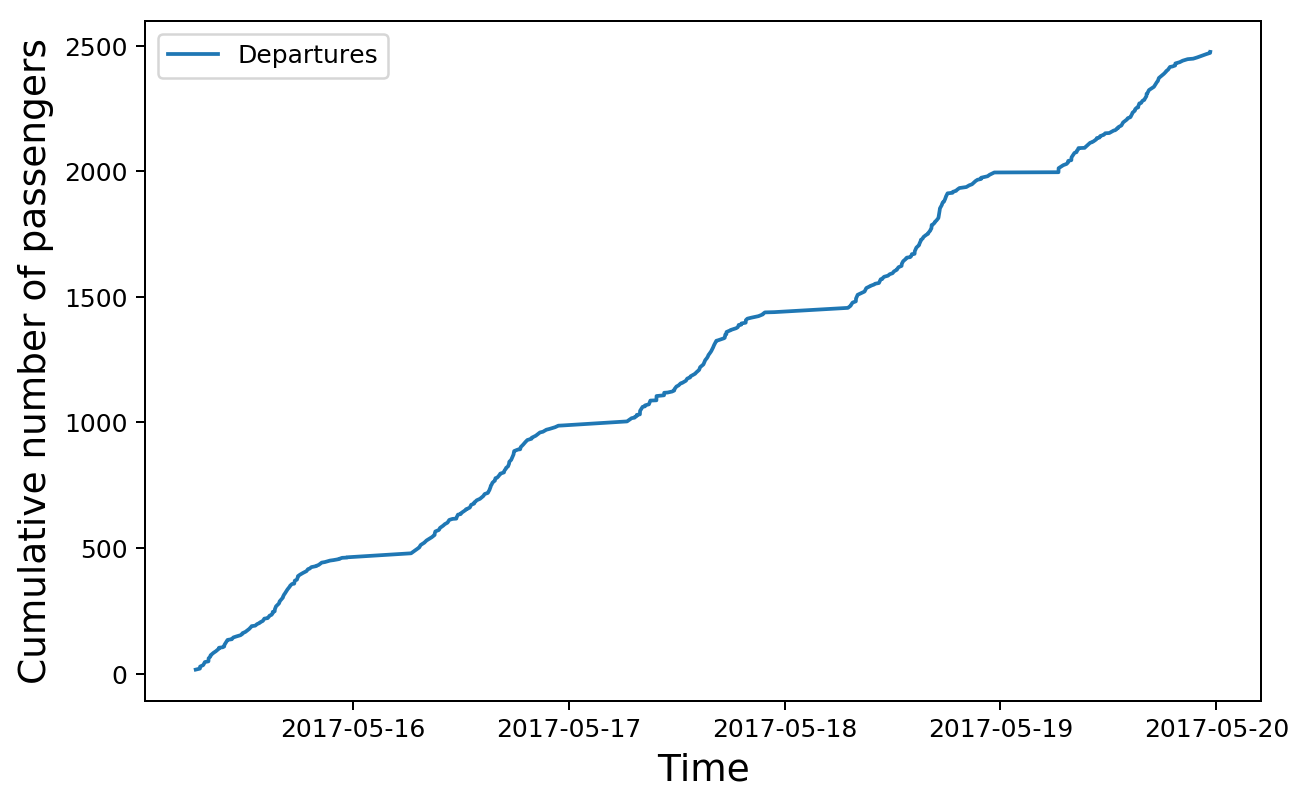

In [7]:
# Make a queuing diagram
plt.figure(figsize=[8,5],dpi=180) # Choose the size of your plots.

plt.plot(dfDHLR_tag1['TAG1_datetime'],dfDHLR_tag1['count_tag1'],label='Departures')

#Label the axes
plt.xlabel('Time',fontsize=15)
plt.ylabel('Cumulative number of passengers',fontsize=15)
plt.legend(loc=2)

plt.savefig('DHLR_Daily_N_t.png') # you can choose the format and resolution that suits you best


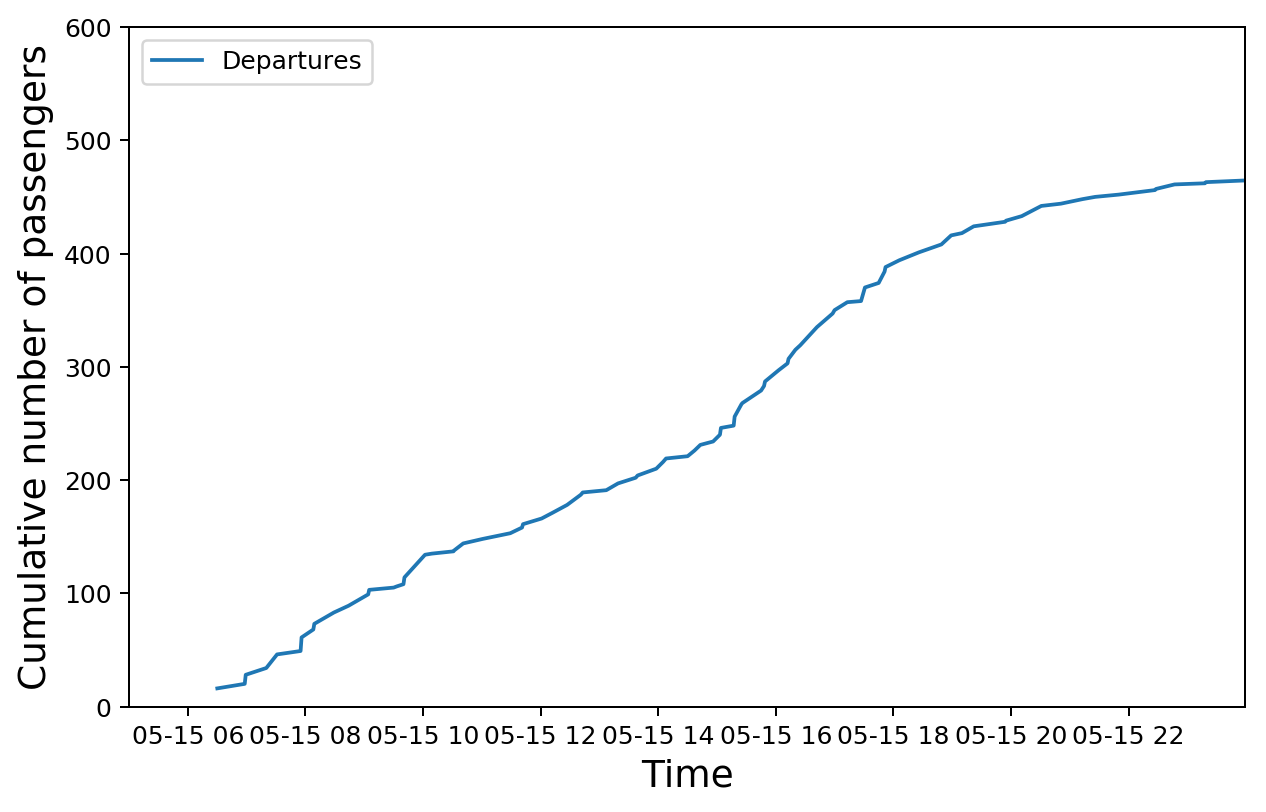

In [9]:
# Now do exactly the same thing, but zoom in on 6am -10am

fig, ax = plt.subplots(figsize=[8,5],dpi=180)

plt.plot(dfDHLR_tag1['TAG1_datetime'],dfDHLR_tag1['count_tag1'],label='Departures')

ax.set_xlim([datetime(2017, 5, 15, 5, 0, 0),datetime(2017, 5, 15, 23,59, 0)])
ax.set_ylim([0,600])

#Label the axes
plt.xlabel('Time',fontsize=15)
plt.ylabel('Cumulative number of passengers',fontsize=15)
plt.legend(loc=2)

plt.savefig('DHLR_Daily_N_t_6-10.png') # save it with a different name.

In [13]:
#Now that we know what the data looks like, can we start to make a simple model?
# Assume that arrivals are deterministic in 3 distinct phases: 6am - 7:15, 7:16-8:45, 8:46-10am.

# What is the arrival rate?
# Divide the number of passengers by the total interval:


start630 = dfDHLR_tag1[(dfDHLR_tag1['TAG1_datetime']<=datetime(2017, 5, 15, 6, 30, 0))]['count_tag1'].max()
numat800 = dfDHLR_tag1[(dfDHLR_tag1['TAG1_datetime']<=datetime(2017, 5, 15, 8, 0, 0))]['count_tag1'].max()
numat1000 = dfDHLR_tag1[(dfDHLR_tag1['TAG1_datetime']<=datetime(2017, 5, 15, 10, 0, 0))]['count_tag1'].max()
numat1430 = dfDHLR_tag1[(dfDHLR_tag1['TAG1_datetime']<=datetime(2017, 5, 15, 14, 30, 0))]['count_tag1'].max()
numat1800 = dfDHLR_tag1[(dfDHLR_tag1['TAG1_datetime']<=datetime(2017, 5, 15, 18, 0, 0))]['count_tag1'].max()
numat2100 = dfDHLR_tag1[(dfDHLR_tag1['TAG1_datetime']<=datetime(2017, 5, 15, 21, 0, 0))]['count_tag1'].max()
numat2359 = dfDHLR_tag1[(dfDHLR_tag1['TAG1_datetime']<=datetime(2017, 5, 15, 23, 59, 0))]['count_tag1'].max()
print(start630,numat1000,numat1430,numat1800,numat2100,numat2359)
Arr_rate1 = (numat800-start630)/2.5 # 6:30-10 is 3.5 hrs
Arr_rate2 = (numat1000-numat800)/2 # 6:30-10 is 3.5 hrs
Arr_rate3 = (numat1430-numat1000)/4.5 # 10-14:30 is 4.5 hrs
Arr_rate4 = (numat1800-numat1430)/3.5 # 14:30-18:00 is 3.5 hrs
Arr_rate5 = (numat2100-numat1800)/3 # 18:00-21:00 is 3 hrs
Arr_rate6 = (numat2359-numat2100)/3 # 21:00-23:59 is 3 hrs
print("Arrival rates are", Arr_rate1,',',Arr_rate2,',',Arr_rate3,',',Arr_rate4,',',Arr_rate5,',',Arr_rate5,'pax/hr in the 6 periods')

16 114 221 388 444 463
Arrival rates are 18.0 , 26.5 , 23.7777777778 , 47.7142857143 , 18.6666666667 , 18.6666666667 pax/hr in the 6 periods


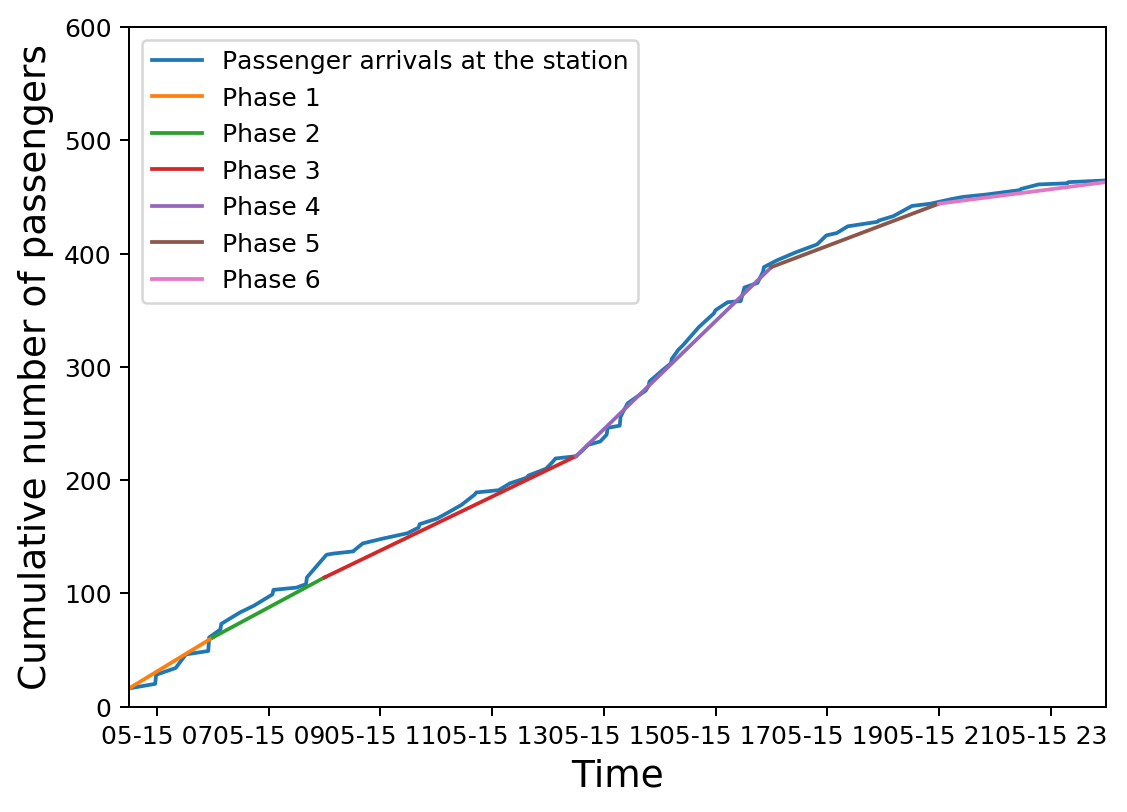

In [15]:
# Now make a queuing diagram with the deterministic model over the top.
# Make a queuing diagram

fig, ax = plt.subplots(figsize=[7,5],dpi=180)

plt.plot(dfDHLR_tag1['TAG1_datetime'],dfDHLR_tag1['count_tag1'],label='Passenger arrivals at the station')

ax.set_xlim([datetime(2017, 5, 15, 6, 30, 0),datetime(2017, 5, 15, 23, 59, 0)])
ax.set_ylim([0,600])


plt.plot([datetime(2017,5,15,6,30,0),datetime(2017,5,15,8,0,0)],[start630,numat800],label='Phase 1')
plt.plot([datetime(2017,5,15,8,0,0),datetime(2017,5,15,10,0,0)],[numat800,numat1000],label='Phase 2')
plt.plot([datetime(2017,5,15,10,0,0),datetime(2017,5,15,14,30,0)],[numat1000,numat1430],label='Phase 3')
plt.plot([datetime(2017,5,15,14,30,0),datetime(2017,5,15,18,0,0)],[numat1430,numat1800],label='Phase 4')
plt.plot([datetime(2017,5,15,18,0,0),datetime(2017,5,15,21,0,0)],[numat1800,numat2100],label='Phase 5')
plt.plot([datetime(2017,5,15,21,0,0),datetime(2017,5,15,23,59,0)],[numat2100,numat2359],label='Phase 6')

#Label the axes
plt.xlabel('Time',fontsize=15)
plt.ylabel('Cumulative number of passengers',fontsize=15)
plt.legend(loc=2)

plt.savefig('DHLR_Daily_N_t_peak_Deterministic.png') # save it with a different name.
